Evaluating Linear kernel


C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python3

Evaluating Rbf kernel


C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python3

Evaluating Poly kernel


C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python3

Evaluating Sigmoid kernel


C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=2).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=3).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python312\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
C:\Users\Siddhant\AppData\Roaming\Python\Python3

Linear Kernel: Maximum Test Accuracy = 73.57% at Iteration = 89
Rbf Kernel: Maximum Test Accuracy = 55.71% at Iteration = 36
Poly Kernel: Maximum Test Accuracy = 44.29% at Iteration = 105
Sigmoid Kernel: Maximum Test Accuracy = 51.43% at Iteration = 54


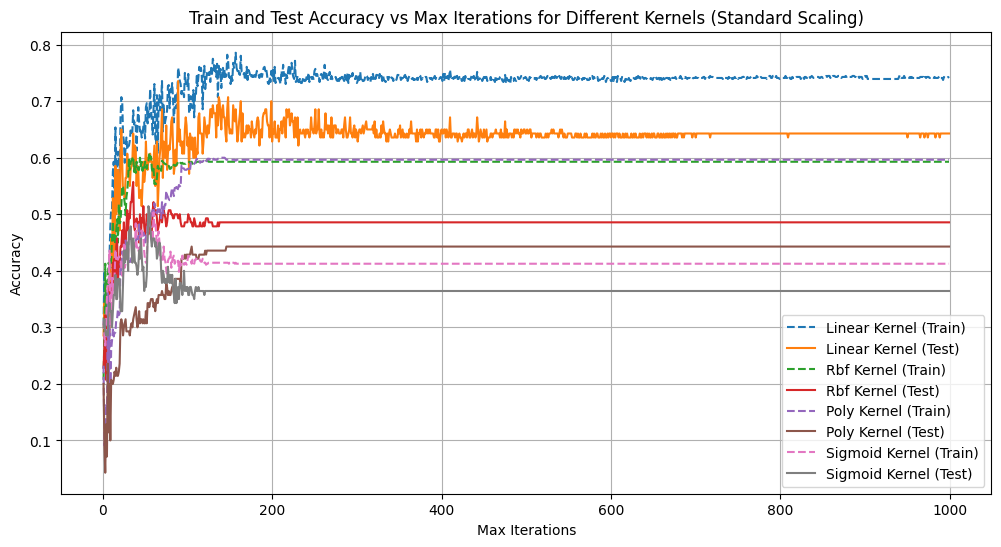

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Load dataset
file = pd.read_csv('Absenteeism_data.csv')

# Prepare the features and target variable
X = file.drop(['ID', 'Date'], axis=1)
Y = file['Absenteeism Time in Hours']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Apply Standard Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

kernels = ['linear', 'rbf', 'poly', 'sigmoid']

# Define the range for max_iter
max_iter_range = range(1, 1000)
train_accuracies = {kernel: [] for kernel in kernels}  # To store train accuracies for each kernel
test_accuracies = {kernel: [] for kernel in kernels}   # To store test accuracies for each kernel

max_accuracy_iterations = {}

# Train and evaluate the model
for kernel in kernels:
    print(f"Evaluating {kernel.capitalize()} kernel")
    for max_iter in max_iter_range:
        svm_model = SVC(kernel=kernel, random_state=42, max_iter=max_iter)
        svm_model.fit(X_train_scaled, y_train)
        
        # Predict on train and test datasets
        train_pred = svm_model.predict(X_train_scaled)
        test_pred = svm_model.predict(X_test_scaled)
        
        # Calculate accuracy for train and test sets
        train_accuracy = accuracy_score(y_train, train_pred)
        test_accuracy = accuracy_score(y_test, test_pred)
        
        # Store accuracies
        train_accuracies[kernel].append(train_accuracy)
        test_accuracies[kernel].append(test_accuracy)
    
    # Find the iteration with the maximum train and test accuracy
    max_train_accuracy = max(train_accuracies[kernel])
    max_train_iter = train_accuracies[kernel].index(max_train_accuracy) + 1  # +1 because range starts at 1
    
    max_test_accuracy = max(test_accuracies[kernel])
    max_test_iter = test_accuracies[kernel].index(max_test_accuracy) + 1  # +1 because range starts at 1
    
    max_accuracy_iterations[kernel] = {
        "max_train_acc": max_train_accuracy,
        "max_train_iter": max_train_iter,
        "max_test_acc": max_test_accuracy,
        "max_test_iter": max_test_iter,
    }

# Print the results
for kernel, acc_data in max_accuracy_iterations.items():
    print(
        f"{kernel.capitalize()} Kernel:\n"
        f"  Maximum Train Accuracy = {acc_data['max_train_acc']*100:.2f}% at Iteration = {acc_data['max_train_iter']}\n"
        f"  Maximum Test Accuracy  = {acc_data['max_test_acc']*100:.2f}% at Iteration = {acc_data['max_test_iter']}"
    )

# Plotting Accuracy vs Max Iterations for each kernel
plt.figure(figsize=(12, 6))

for kernel in kernels:
    plt.plot(max_iter_range, train_accuracies[kernel], label=f'{kernel.capitalize()} Kernel (Train)', linestyle='--')
    plt.plot(max_iter_range, test_accuracies[kernel], label=f'{kernel.capitalize()} Kernel (Test)', linestyle='-')

plt.title('Train and Test Accuracy vs Max Iterations for Different Kernels (Standard Scaling)')
plt.xlabel('Max Iterations')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()